In [23]:
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

arff_file_path = './Rice_Cammeo_Osmancik.arff'

data, meta = arff.loadarff(arff_file_path)

df = pd.DataFrame(data)

df = df.sample(frac=1).reset_index(drop=True)

scaler = MinMaxScaler()

column_to_be_normalized = ['Area', 'Perimeter','Major_Axis_Length','Minor_Axis_Length','Convex_Area']

scaler.fit(df[column_to_be_normalized])

df[column_to_be_normalized] = scaler.transform(df[column_to_be_normalized])

features = df.drop("Class", axis=1)
label = df["Class"]


X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.16, random_state=42)


class LogisticRegressionGD:
    def __init__(self, data, labels,learning_rate):
        self.weights = np.random.rand(data.shape[1])
        self.data = data
        self.labels = labels
        self.learning_rate = learning_rate
        self.N = len(data)
        self.threshold = 0.00004

    def fit(self):
        prev_weights = None
        while not self.termination_condition(self.weights,prev_weights):
            prev_weights = self.weights + np.zeros(self.weights.shape[0])
            self.predict()
            print(self.calculate_error(self.weights))
            
    def calculate_error(self,weights):
        sum = 0
        for i in range(self.N):
            sum = sum + np.log(1 + np.exp(-self.labels[i]*(weights @ self.data[i])))
        sum =  (1/self.N)*sum
        return sum

        
    def termination_condition(self,curr_weights, prev_weights = None):
           if (prev_weights is not None) and abs(self.calculate_error(curr_weights) - self.calculate_error(prev_weights))<self.threshold:
                return True
           return False
           
           
    def predict(self):
        gradient = 0
        for i in range(self.N):
            gradient = gradient + (self.labels[i]*self.data[i])/(1 + np.exp(self.labels[i]*(self.weights @ self.data[i])))
        gradient =  (-1/self.N)*gradient
        direction = -gradient
        self.weights = self.weights + self.learning_rate*direction


class LogisticRegressionSGD:
    def __init__(self, data, labels,learning_rate):
        self.weights = np.random.rand(data.shape[1])
        self.data = data
        self.labels = labels
        self.learning_rate = learning_rate
        self.N = len(data)
        self.threshold = 0.00004
        self.error_data = list()

    def fit(self):
        prev_weights = None
        while True:
            random_index = None
            for round_count in range(self.N):
                random_index = np.random.randint(0, self.N)
                prev_weights = self.weights + np.zeros(self.weights.shape[0])
                self.predict(random_index)
                random_index = np.random.randint(0, self.N)
                self.error_data.append(self.calculate_error(self.weights,random_index))
            if random_index is not None and self.termination_condition(self.weights,prev_weights,random_index):
                break
                    
    def calculate_error(self,weights,random_index):
        return np.log(1 + np.exp(-self.labels[random_index]*(weights @ self.data[random_index])))

        
    def termination_condition(self,curr_weights,prev_weights,random_index):
           if (prev_weights is not None) and abs(self.calculate_error(curr_weights,random_index) - self.calculate_error(prev_weights,random_index))<self.threshold:
                return True
           return False
           
           
    def predict(self,random_index):
        direction = (self.labels[random_index]*self.data[random_index])/(1 + np.exp(self.labels[random_index]*(self.weights @ self.data[random_index])))
        self.weights = self.weights + self.learning_rate*direction

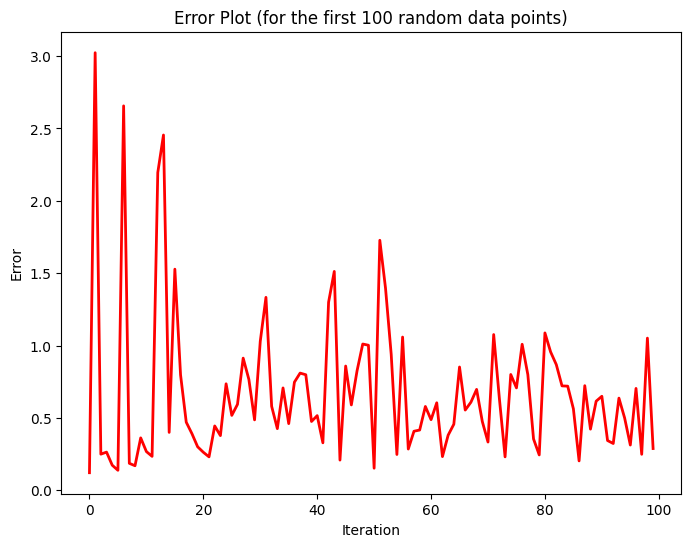

In [26]:
def main():
    tranformed_y_train = [-1 if x == b'Cammeo' else 1 for x in y_train.values]
    logistic_regression = LogisticRegressionSGD(X_train.values, tranformed_y_train, 0.4)
    logistic_regression.fit()
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', marker='o', label='Data points')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()